In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ensemble.distributions import distribution_dict
from ensemble.ensemble_model import EnsembleFitter, EnsembleModel

# Fitting individual distributions

Optimization terminated successfully.
         Current function value: 15.088468
         Iterations: 18
         Function evaluations: 66
         Gradient evaluations: 22
params from optim:  0.372934352041326 6.535494538174693


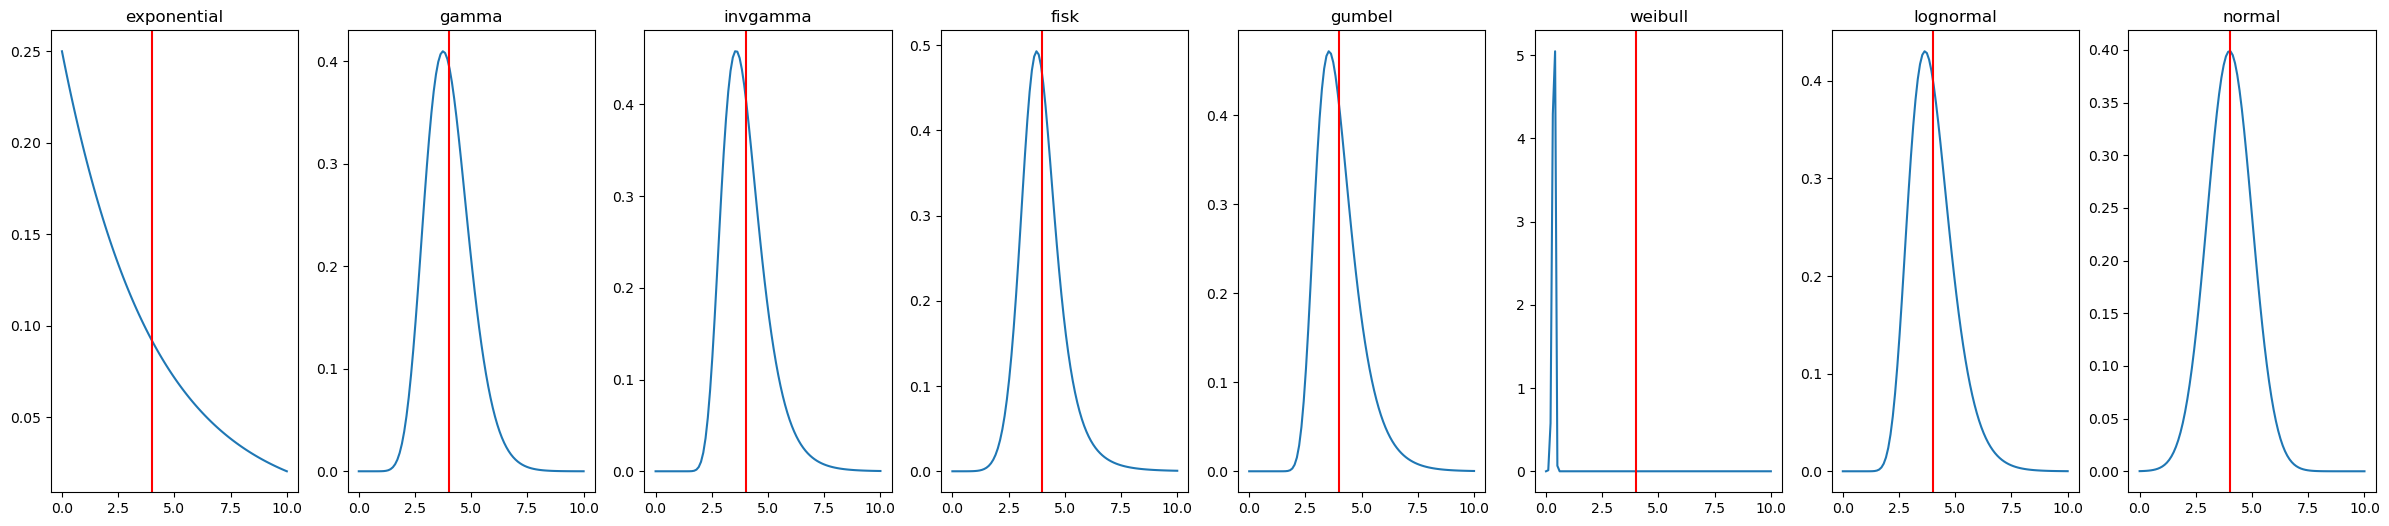

In [2]:
MEAN = 4
VARIANCE = 1
fitted_distributions = {}
counter = 0
fig, ax = plt.subplots(1, len(distribution_dict) - 1, figsize=(30, 6))
for distribution in distribution_dict:
  if distribution != "beta":
    fitted_distributions[distribution] = distribution_dict[distribution](MEAN, VARIANCE)
    # support_01 = np.linspace(0.00000001, 0.999999999, 100)
    # quantiles = fitted_distributions[distribution].ppf(support_01)
    # ax[counter].hist(quantiles)
    support = np.linspace(0, 10, 100)
    pdf = fitted_distributions[distribution].pdf(support)
    ax[counter].plot(support, pdf)
    ax[counter].axvline(MEAN, color="red")
    ax[counter].title.set_text(distribution)
    counter += 1


# Fitting ensemble distributions

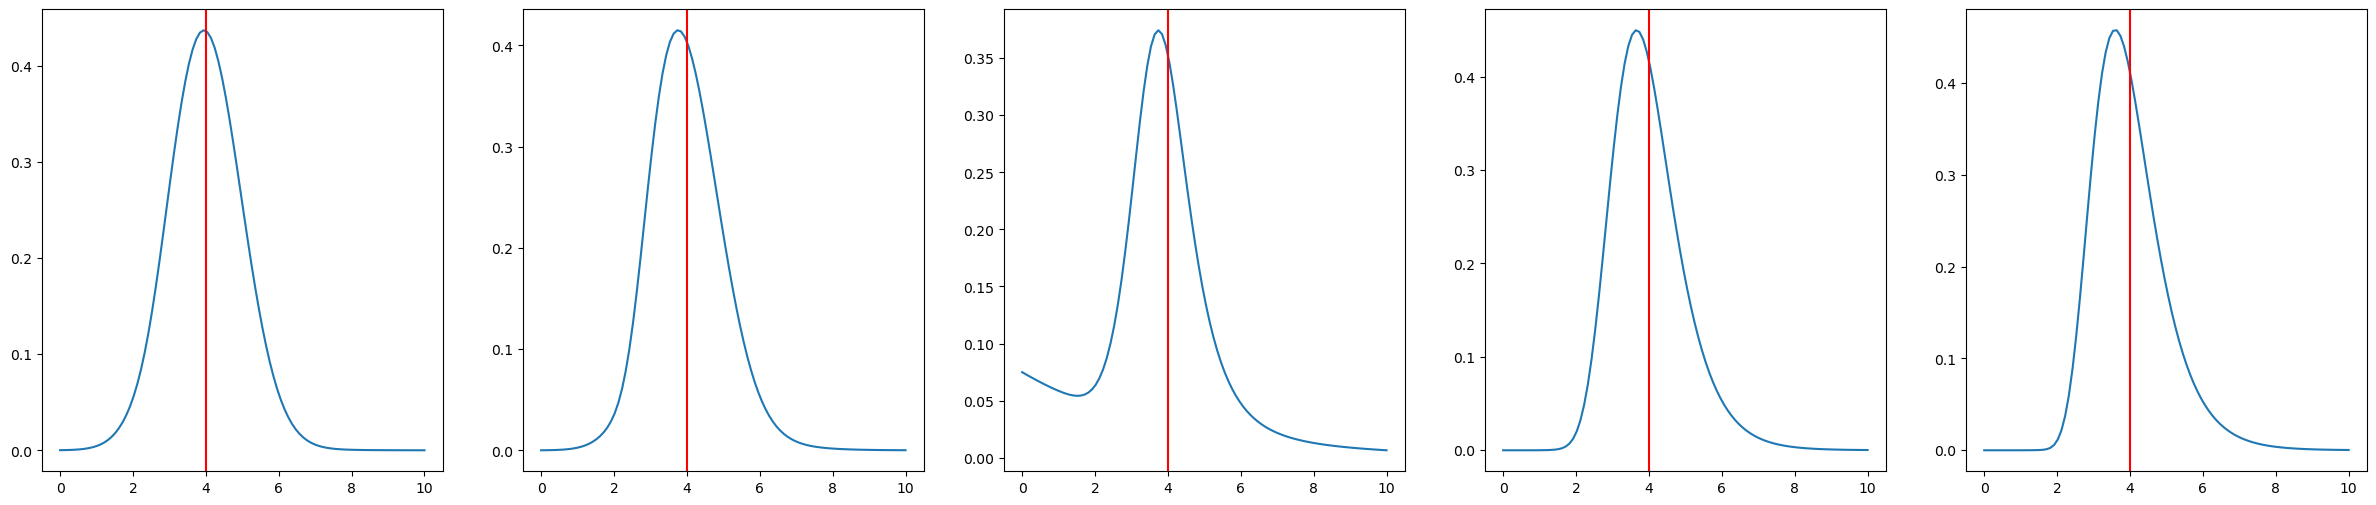

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
support = np.linspace(0, 10, 100)

mod0 = EnsembleModel(["normal", "gumbel"], [0.99, 0.1], MEAN, VARIANCE)
pdf0 = mod0.pdf(support)
ax[0].plot(support, pdf0)
ax[0].axvline(MEAN, color="red")

mod1 = EnsembleModel(["normal", "gumbel"], [0.6, 0.4], MEAN, VARIANCE)
pdf1 = mod1.pdf(support)
ax[1].plot(support, pdf1)
ax[1].axvline(MEAN, color="red")

mod2 = EnsembleModel(["exponential", "fisk"], [0.3, 0.7], MEAN, VARIANCE)
pdf2 = mod2.pdf(support)
ax[2].plot(support, pdf2)
ax[2].axvline(MEAN, color="red")

mod3 = EnsembleModel(["invgamma", "lognormal", "fisk"], [0.3, 0.5, 0.2], MEAN, VARIANCE)
pdf3 = mod3.pdf(support)
ax[3].plot(support, pdf3)
ax[3].axvline(MEAN, color="red")

mod4 = EnsembleModel(["invgamma", "lognormal", "fisk"], [0.9, 0.05, 0.05], MEAN, VARIANCE)
pdf4 = mod4.pdf(support)
ax[4].plot(support, pdf4)
ax[4].axvline(MEAN, color="red")

# Comparing fitted ensemble distributions to truth

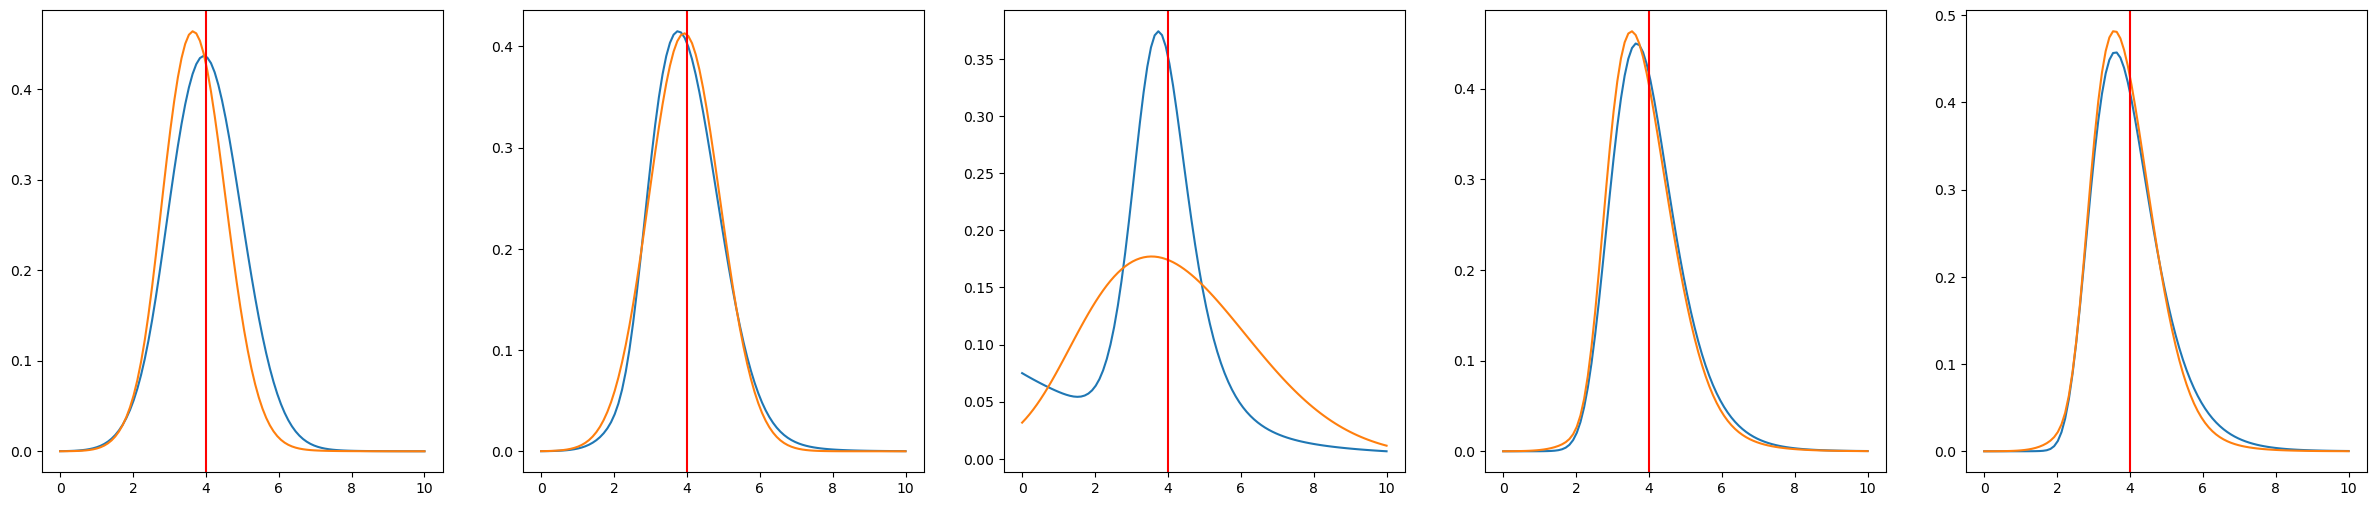

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
support = np.linspace(0, 10, 100)

mod0 = EnsembleModel(["normal", "gumbel"], [0.99, 0.1], MEAN, VARIANCE)
mod0_draws = mod0.rvs(size=100)
fit0 = EnsembleFitter(["normal", "gumbel"], "L2").fit(mod0_draws)
pdf0 = mod0.pdf(support)
ax[0].plot(support, pdf0)
ax[0].plot(support, fit0.ensemble_model.pdf(support))
ax[0].axvline(MEAN, color="red")

mod1 = EnsembleModel(["normal", "gumbel"], [0.6, 0.4], MEAN, VARIANCE)
mod1_draws = mod1.rvs(size=100)
fit1 = EnsembleFitter(["normal", "gumbel"], "L2").fit(mod1_draws)
pdf1 = mod1.pdf(support)
ax[1].plot(support, pdf1)
ax[1].plot(support, fit1.ensemble_model.pdf(support))
ax[1].axvline(MEAN, color="red")

mod2 = EnsembleModel(["exponential", "fisk"], [0.3, 0.7], MEAN, VARIANCE)
mod2_draws = mod2.rvs(size=100)
fit2 = EnsembleFitter(["normal", "gumbel"], "L2").fit(mod2_draws)
pdf2 = mod2.pdf(support)
ax[2].plot(support, pdf2)
ax[2].plot(support, fit2.ensemble_model.pdf(support))
ax[2].axvline(MEAN, color="red")

mod3 = EnsembleModel(["invgamma", "lognormal", "fisk"], [0.3, 0.5, 0.2], MEAN, VARIANCE)
mod3_draws = mod3.rvs(size=100)
fit3 = EnsembleFitter(["normal", "gumbel"], "L2").fit(mod3_draws)
pdf3 = mod3.pdf(support)
ax[3].plot(support, pdf3)
ax[3].plot(support, fit3.ensemble_model.pdf(support))
ax[3].axvline(MEAN, color="red")

mod4 = EnsembleModel(["invgamma", "lognormal", "fisk"], [0.9, 0.05, 0.05], MEAN, VARIANCE)
mod4_draws = mod4.rvs(size=100)
fit4 = EnsembleFitter(["normal", "gumbel"], "L2").fit(mod4_draws)
pdf4 = mod4.pdf(support)
ax[4].plot(support, pdf4)
ax[4].plot(support, fit4.ensemble_model.pdf(support))
ax[4].axvline(MEAN, color="red")

# How does Scipy work?

In [5]:
# helper funcs
def reverse_z(z, mean, variance):
  return z * np.sqrt(variance) + mean

(4.0, 1.0)
0.022750131948179195


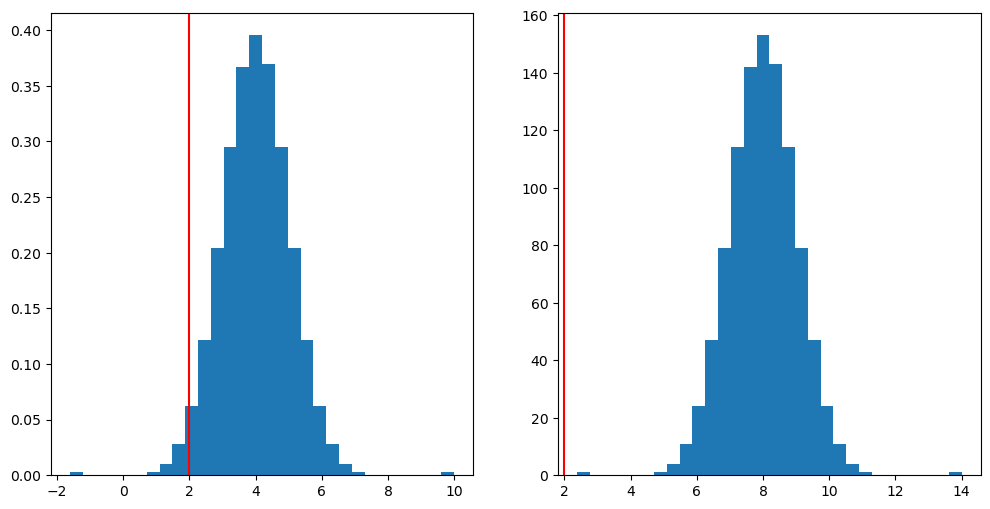

In [6]:
# initialize Normal(0, 1)
MEAN = 4
VARIANCE = 1
std_norm = distribution_dict["normal"](MEAN, VARIANCE)
print(std_norm.stats(moments="mv"))
support_01 = np.linspace(0.00000001, 0.999999999, 1000)
quantiles = std_norm.ppf(support_01)
vals = reverse_z(quantiles, MEAN, VARIANCE)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(quantiles, density=True, bins=30)
quantile = 2
print(std_norm.cdf(quantile))
ax[0].axvline(quantile, color="red")

ax[1].hist(vals, bins=30)
ax[1].axvline(quantile, color="red")
plt.show()





* this shows that cdf and pdf take values from the real line, as if cdf were to take 